# L'IRM une mesure qualitative

### Importations des données

Maintenant que nos outils sont chargés, nous allons charger nos données.

Cliquez sur le lien ci-dessous : 

https://drive.google.com/open?id=16ZLvd-K80ceBOK22Qt_0vS5r_EuW21IL

Cliquer droit sur le dossier data et appuyer sur ajouter à mon drive.

<img src="https://github.com/MorganGautherot/Tuto_MRI_ML/blob/master/tp_3/images/data_google_drive.png?raw=1" width="800" >

Exécutez la cellule ci-dessous et appuyez sur le lien proposé. 

Suivez les instructions et copiez le code ci-dessous.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


Les données sont maintenant dans votre environnement collab.

L'acquisition de données en imagerie médicale coûte très cher et les installations ne permettent pas l'acquisition de grande cohorte en peu de temps. 
L'utilisation de deep learning demande une grande quantité d'images afin de comprendre le phénomène à modéliser et d'effectuer des prédictions précises. 
De ce fait pour l'entraînement de modèle de deep learning les laboratoires ont de plus en plus recours à des données multi-centriques, provenant de différents centres, étant acquises avec différentes machines, avec des séquences différentes.

L'un des principaux défis est le manque de normalisation des protocoles d'acquisition d'images, du matériel et des logiciels des scanners. Il a été démontré que la variabilité entre les scanners affectent les mesures obtenues pour l'analyse. 

Le fait que nos mesures ne soient pas quantative, mais qualitative, pose des problèmes pour notre algorithme de deep learning. Toutes les images ne seront pas sur la même échelle. Une valeur sur une image n'aura pas forcément la même signification sur une autre image. Ce manque de cohérence est un gros problème dans l'apprentissage d'un modèle de machine learning. 



In [0]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [0]:
# Calculs scientifiques
import numpy as np
# Gestion des formats IRM
import nibabel as nib
# Trouver les picks d'une courbe
from scipy.signal import find_peaks
# Création et affichage de graphiques
import matplotlib.pyplot as plt
import seaborn as sns

Dans ce [jeu de données](https://brain-development.org/ixi-dataset/) vous verrez des images acquises par trois centres Hammersmith Hospital, Guy’s Hospital et Institute of Psychiatry.

In [0]:
# Une image acquise par le centre Hammersmith Hospital 
hh_img = nib.load('/content/gdrive/My Drive/tp_3/data/IXI338/IXI338-HH-1971-T1.nii.gz').get_fdata()

# Une image acquise par l'institute of Psychiatry
iop_img = nib.load('/content/gdrive/My Drive/tp_3/data/IXI331/IXI331-IOP-0892-T1.nii.gz').get_fdata()

# Une image acquise par le centre Guy's Hospital
guys_img = nib.load('/content/gdrive/My Drive/tp_3/data/IXI330/IXI330-Guys-0881-T1.nii.gz').get_fdata()

In [5]:
# On transforme la martice de trois dimensions en vecteur
hh_vector = hh_img.flatten()
print('Dimension de la matrice hh ',hh_img.shape)
print('Dimension du vecteur hh ', hh_vector.shape)

# On transforme la martice de trois dimensions en vecteur
iop_vector = iop_img.flatten()
print('Dimension de la matrice iop ',iop_img.shape)
print('Dimension du vecteur iop ', iop_vector.shape)

# On transforme la martice de trois dimensions en vecteur
guys_vector = guys_img.flatten()
print('Dimension de la matrice guys ',guys_img.shape)
print('Dimension du vecteur guys ', guys_vector.shape)

Dimension de la matrice hh  (256, 256, 150)
Dimension du vecteur hh  (9830400,)
Dimension de la matrice iop  (256, 256, 146)
Dimension du vecteur iop  (9568256,)
Dimension de la matrice guys  (256, 256, 150)
Dimension du vecteur guys  (9830400,)


On trace la distribution des intensités de notre image du centre Hammersmith Hospital.

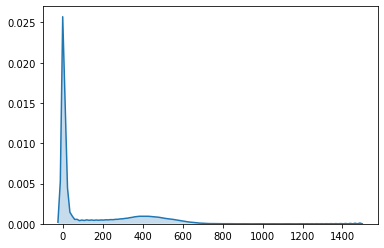

In [6]:
sns.kdeplot(hh_vector, shade=True)
plt.show()

Comme vous pouvez le voir, beaucoup de valeurs sont proche de 0. Ces valeurs proches de 0 correspondent aux pixels noires qui entourent notre cerveau. Pour avoir une meilleure visualisation de notre distribution, nous pouvons seulement regarder notre distribution pour les intensités proche de 0.

On peut voir que les images ne sont pas du tout sur la même échelle.

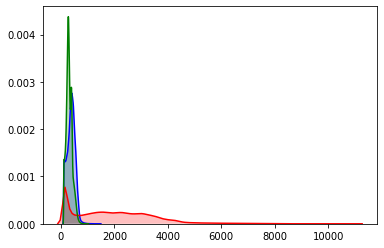

In [7]:
sns.kdeplot(hh_vector[hh_vector > 100], shade=True, color='blue')
sns.kdeplot(iop_vector[iop_vector > 100], shade=True, color='red')
sns.kdeplot(guys_vector[guys_vector > 100], shade=True, color='green')
plt.show()

On peut tracer nos distributions séparément pour y voir plus clair.

Intensité maximum du centre Hammersmith Hospital  1474.0


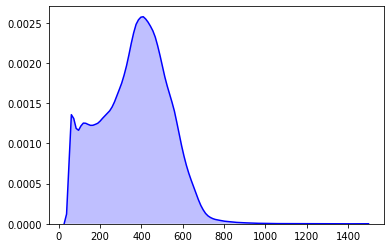

Intensité maximum du centre Institue of Psychiatry  11057.0


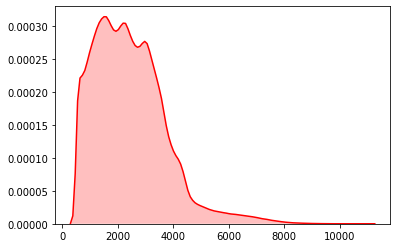

Intensité maximum du centre Guys's Hospital  1017.0


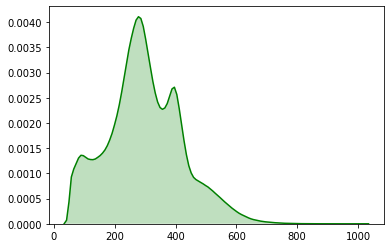

In [8]:
print('Intensité maximum du centre Hammersmith Hospital ',max(hh_vector))
sns.kdeplot(hh_vector[hh_vector > 50], shade=True, color='blue')
plt.show()

print('Intensité maximum du centre Institue of Psychiatry ',max(iop_vector))
sns.kdeplot(iop_vector[iop_vector > 500], shade=True, color='red')
plt.show()

print('Intensité maximum du centre Guys\'s Hospital ',max(guys_vector))
sns.kdeplot(guys_vector[guys_vector > 50], shade=True, color='green')
plt.show()

Vous avez maintenant vu les problèmes que pose la mesure qualitative de l'IRM.

## Homogénéisation du champ

Au cours de l'acquisition d'une image IRM, les champs électromagnétiques ne sont pas toujours homogènes. Cette inhomogénéité change les intensités et déforme l'image. La correction du champ consiste à corriger les intensités de voxels dues à la présence d'une non-uniformité de l'intensité des basses fréquences.

Comme vous pouvez le voir ci-dessous (L'image à été emprunté à cet [article](https://www.biorxiv.org/content/10.1101/413302v1))

<img src='https://github.com/MorganGautherot/Tuto_MRI_ML/blob/master/tp_3/images/nonuniformity.jpg?raw=1' width=500) >

Nous avons utilisé le logiciel [freesurfer](https://surfer.nmr.mgh.harvard.edu) afin de corriger cette erreur.

In [0]:
# Une image acquise par le centre Hammersmith Hospital 
hh_img = nib.load('/content/gdrive/My Drive/tp_3/data/IXI338/sub-IXI338_desc-preproc_T1w.nii.gz').get_fdata()

# Une image acquise par l'institute of Psychiatry
iop_img = nib.load('/content/gdrive/My Drive/tp_3/data/IXI331/sub-IXI331_desc-preproc_T1w.nii.gz').get_fdata()

# Une image acquise par le centre Guy's Hospital
guys_img = nib.load('/content/gdrive/My Drive/tp_3/data/IXI330/sub-330_desc-preproc_T1w.nii.gz').get_fdata()

On peut visualiser si la distribution de nos intensités a été affectée par la correction de ce problème.

Intensité maximum du centre Hammersmith Hospital  17830.279296875


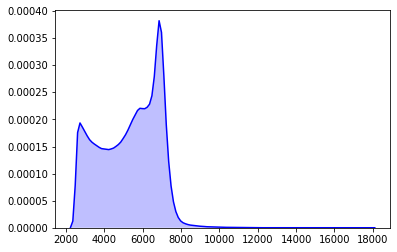

Intensité maximum du centre Institue of Psychiatry  67217.5625


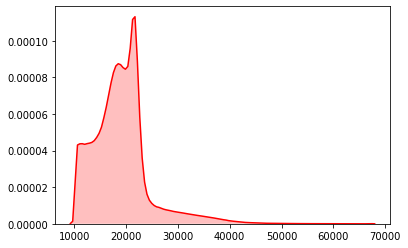

Intensité maximum du centre Guys's Hospital  21779.984375


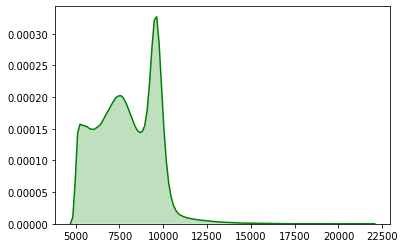

In [19]:
print('Intensité maximum du centre Hammersmith Hospital ',max(hh_img.flatten()))
sns.kdeplot(hh_img.flatten()[hh_img.flatten() > 2500], shade=True, color='blue')
plt.show()

print('Intensité maximum du centre Institue of Psychiatry ',max(iop_img.flatten()))
sns.kdeplot(iop_img.flatten()[iop_img.flatten() > 10000], shade=True, color='red')
plt.show()

print('Intensité maximum du centre Guys\'s Hospital ',max(guys_img.flatten()))
sns.kdeplot(guys_img.flatten()[guys_img.flatten() > 5000], shade=True, color='green')
plt.show()

## Travailler dans un espace commun

Lors de l'acquisition de l'image, on obtient des intensités dans un certain espace. Chaque image IRM est dans un espace différent. Comme vous pouvez voir l'image ci-dessous, les images ne sont pas recalées.


<center>
<img src='https://github.com/MorganGautherot/Tuto_MRI_ML/blob/master/tp_3/images/sans_recalage.gif?raw=1' >
</center>


De plus, les images acquises dans des centres différents, peuvent ne pas avoir les mêmes dimensions. 

In [20]:
print('Dimension du vecteur hh ', hh_img.shape)
print('Dimension de la matrice iop ',iop_img.shape)
print('Dimension de la matrice guys ',guys_img.shape)

Dimension du vecteur hh  (150, 256, 256)
Dimension de la matrice iop  (146, 256, 256)
Dimension de la matrice guys  (150, 256, 256)


S'ils ont veux appliquer un algorithme de deep learning sur nos images, il faut qu'elles aient toutes les mêmes dimensions. Pour cela, nous allons recaler nos images dans un même espace avec les mêmes dimensions. 

Nous allons recaler toutes nos images IRM sur une images de références comme l'image ci-dessous.

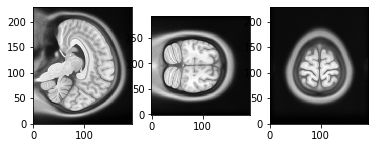

In [22]:
# L'image de référence
mni_img = nib.load('/content/gdrive/My Drive/tp_3/data/mni_icbm152_t1_tal_nlin_asym_09c.nii').get_fdata()

# Visualisation d'une coupe sagittale du masque
slice_0 = mni_img[90, :, :]

# Visualisation d'une coupe coronale du masque
slice_1 = mni_img[:, 50, :]

# Visualisation d'une coupe axiale du masque
slice_2 = mni_img[:, :, 150]

show_slices([slice_0.T, slice_1.T, slice_2])
plt.show()

Nous avons utilisé le logiciel [Ants](http://stnava.github.io/ANTs/) pour recaler nos images. Une fois recalées, nos images sont bien dans le même espace (cf image ci-dessous)

<img src='https://github.com/MorganGautherot/Tuto_MRI_ML/blob/master/tp_3/images/avec_recalage.gif?raw=1' />

In [0]:
# L'image de référence
hh_img_mni = nib.load('/content/gdrive/My Drive/tp_3/data/IXI338/sub-IXI338_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz').get_fdata()

# L'image de référence
iop_img_mni = nib.load('/content/gdrive/My Drive/tp_3/data/IXI331/sub-IXI331_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz').get_fdata()

# L'image de référence
guys_img_mni = nib.load('/content/gdrive/My Drive/tp_3/data/IXI330/sub-330_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz').get_fdata()

De plus, elles ont les mêmes dimensions

In [24]:
print('Dimension du vecteur hh ', hh_img_mni.shape)
print('Dimension de la matrice iop ',iop_img_mni.shape)
print('Dimension de la matrice guys ',guys_img_mni.shape)

Dimension du vecteur hh  (193, 229, 193)
Dimension de la matrice iop  (193, 229, 193)
Dimension de la matrice guys  (193, 229, 193)


On peut vérifier si le changement d'espace a eu un impact sur les distributions de nos intensités.

Intensité maximum du centre Hammersmith Hospital  17913.45703125


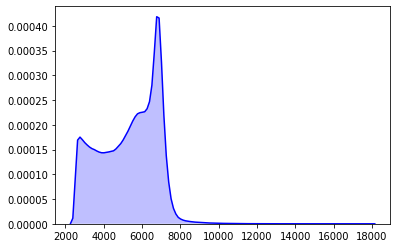

Intensité maximum du centre Institue of Psychiatry  66805.8671875


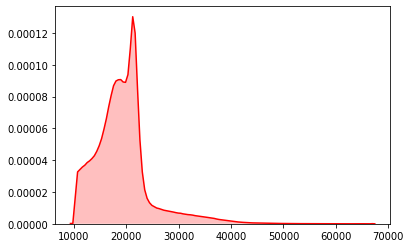

Intensité maximum du centre Guys's Hospital  21661.81640625


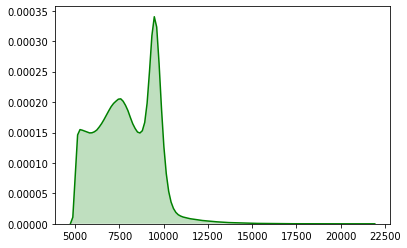

In [25]:
print('Intensité maximum du centre Hammersmith Hospital ',max(hh_img_mni.flatten()))
sns.kdeplot(hh_img_mni.flatten()[hh_img_mni.flatten() > 2500], shade=True, color='blue')
plt.show()

print('Intensité maximum du centre Institue of Psychiatry ',max(iop_img_mni.flatten()))
sns.kdeplot(iop_img_mni.flatten()[iop_img_mni.flatten() > 10000], shade=True, color='red')
plt.show()

print('Intensité maximum du centre Guys\'s Hospital ',max(guys_img_mni.flatten()))
sns.kdeplot(guys_img_mni.flatten()[guys_img_mni.flatten() > 5000], shade=True, color='green')
plt.show()

On peut voir que le recalage dans un espace commun n'affecte pas la distribution des intensités de notre image.

## Extraction du cerveau 

Si nos applications par la suite portent uniquement sur le cerveau, nous pouvons l'extraire afin de travailler seulement sur celui-ci.

Nous avons utiliser [Ants](http://picsl.upenn.edu/software/ants/) afin de segmenter nos cerveaux automatiquement.

In [0]:
# Masque cérébrale de notre image Hammersmith Hospital
hh_brain_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI338/sub-IXI338_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz').get_fdata()

# Masque cérébrale de notre image institute of Psychiatry
iop_brain_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI331/sub-IXI331_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz').get_fdata()

# Masque cérébrale de notre image Guy's Hospital
guys_brain_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI330/sub-330_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz').get_fdata()

Visualisons notre masque.

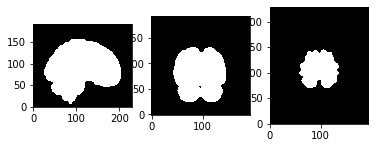

In [27]:
# Visualisation d'une coupe Axiale du masque
slice_0 = hh_brain_mask[90, :, :]

# Visualisation d'une coupe Coronale du masque
slice_1 = hh_brain_mask[:, 50, :]

# Visualisation d'une coupe sagittale du masque
slice_2 = hh_brain_mask[:, :, 150]

show_slices([slice_0, slice_1, slice_2])
plt.show()

Visualisons notre image.

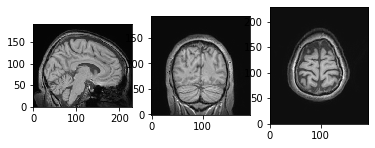

In [28]:
# Visualisation d'une coupe sagittale de l'image
slice_0 = hh_img_mni[90, :, :]

# Visualisation d'une coupe coronale de l'image
slice_1 = hh_img_mni[:, 50, :]

# Visualisation d'une coupe axiale de l'image
slice_2 = hh_img_mni[:, :, 150]

show_slices([slice_0, slice_1, slice_2])
plt.show()

Nous allons multiplier notre masque (matrice de 0 et de 1) pour garder seulement les intensités correspondant à notre cerveau.

In [0]:
# Multplication de notre masque de matière blanche avec les intensités de notre image IRM
hh_brain_img = hh_brain_mask * hh_img_mni

# Multiplication de notre masque de matière grise avec les intensités de notre image IRM
iop_brain_img = iop_brain_mask * iop_img_mni

# Multiplication de notre masque de matière grise avec les intensités de notre image IRM
guys_brain_img = guys_brain_mask * guys_img_mni

Visualisons notre nouvelle image.

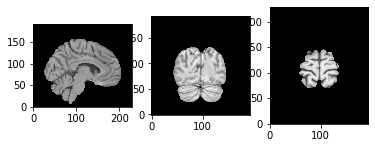

In [31]:
# Visualisation d'une coupe sagittale du cerveau extré
slice_0 = hh_brain_img[90, :, :]

# Visualisation d'une coupe coronale du cerveau extré
slice_1 = hh_brain_img[:, 50, :]

# Visualisation d'une coupe axiale du cerveau extré
slice_2 = hh_brain_img[:, :, 150]

show_slices([slice_0, slice_1, slice_2])
plt.show()

Visualisons la nouvelle distribution de nos intensités.

Intensité maximum du centre Hammersmith Hospital  12464.9384765625


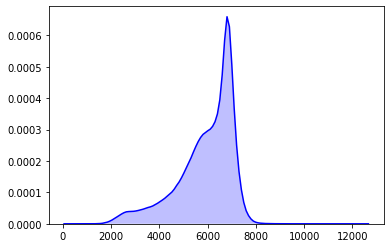

Intensité maximum du centre Institue of Psychiatry  37148.26171875


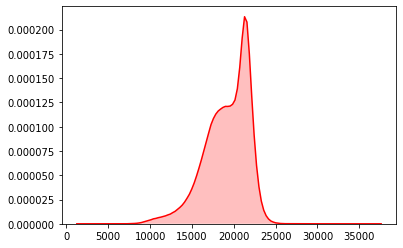

Intensité maximum du centre Guys's Hospital  13066.01171875


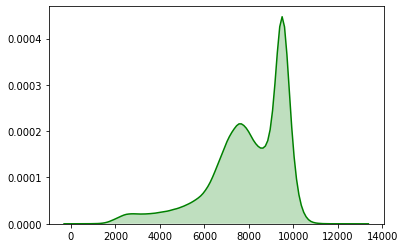

In [32]:
print('Intensité maximum du centre Hammersmith Hospital ',max(hh_brain_img.flatten()))
sns.kdeplot(hh_brain_img.flatten()[hh_brain_img.flatten() > 0], shade=True, color='blue')
plt.show()

print('Intensité maximum du centre Institue of Psychiatry ',max(iop_brain_img.flatten()))
sns.kdeplot(iop_brain_img.flatten()[iop_brain_img.flatten() > 0], shade=True, color='red')
plt.show()

print('Intensité maximum du centre Guys\'s Hospital ',max(guys_brain_img.flatten()))
sns.kdeplot(guys_brain_img.flatten()[guys_brain_img.flatten() > 0], shade=True, color='green')
plt.show()

On peut voir que l'extraction du cerveau à retirer beaucoup de bruit sur la distribution de nos intensités. Mais les intensités sont toujours sur des échelles différentes (cf figure ci-dessous).

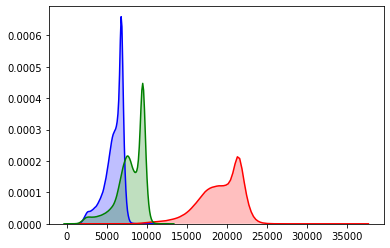

In [33]:
sns.kdeplot(hh_brain_img[hh_brain_img > 0], shade=True, color='blue')
sns.kdeplot(iop_brain_img[iop_brain_img > 0], shade=True, color='red')
sns.kdeplot(guys_brain_img[guys_brain_img > 0], shade=True, color='green')
plt.show()

## Des structures similaires

Comme vous pouvez le voir dans cet [article](http://surfer.nmr.mgh.harvard.edu/ftp/articles/fischl02-labeling.pdf) notre distribution d'intensité est composé en réalité de plusieurs distributions pour différentes structures de notre cerveau. 

Une des façons de rendre les valeurs quantitatives serait d'interpoler les intensités qualitatives pour qu'elles correspondent à des valeurs fixes pour des structures de notre cerveau ainsi que définir une valeur maximale d'intensité. Ces valeurs devront être les mêmes pour chaque image. De cette façon, une valeur sur une image correspondra à la même chose sur une autre image même si elle a été acquise dans un autre centre. 

Avec l'aide du logiciel [freesurfer](https://surfer.nmr.mgh.harvard.edu) nous obtenons des masques représentant la matière blanche et la matière grise.



In [0]:
# Masque matière blanche de notre image Hammersmith Hospital
hh_wm_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI338/sub-IXI338_space-MNI152NLin2009cAsym_label-WM_probseg.nii.gz').get_fdata()

# Masque matière grise de notre image Hammersmith Hospital
hh_gm_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI338/sub-IXI338_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz').get_fdata()

# Masque matière blanche de notre image institute of Psychiatry
iop_wm_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI331/sub-IXI331_space-MNI152NLin2009cAsym_label-WM_probseg.nii.gz').get_fdata()

# Masque matière grise de notre image institute of Psychiatry
iop_gm_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI331/sub-IXI331_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz').get_fdata()

# Masque matière blanche de notre image Guy's Hospital
guys_wm_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI330/sub-330_space-MNI152NLin2009cAsym_label-WM_probseg.nii.gz').get_fdata()

# Masque matière grise de notre image Guy's Hospital
guys_gm_mask = nib.load('/content/gdrive/My Drive/tp_3/data/IXI330/sub-330_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz').get_fdata()

Visualisons nos masques.

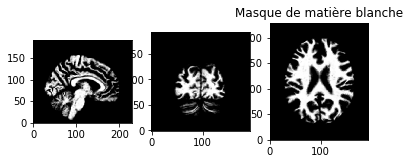

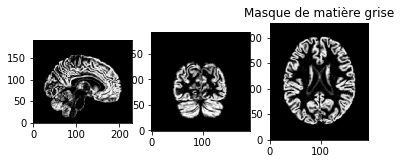

In [35]:
# Visualisation d'une coupe Axiale de l'image
slice_0 = guys_wm_mask[90, :, :]

# Visualisation d'une coupe Coronale de l'image
slice_1 = guys_wm_mask[:, 50, :]

# Visualisation d'une coupe sagittale de l'image
slice_2 = guys_wm_mask[:, :, 100]

show_slices([slice_0, slice_1, slice_2])
plt.title('Masque de matière blanche')
plt.show()

# Visualisation d'une coupe Axiale de l'image
slice_0 = guys_gm_mask[90, :, :]

# Visualisation d'une coupe Coronale de l'image
slice_1 = guys_gm_mask[:, 50, :]

# Visualisation d'une coupe sagittale de l'image
slice_2 = guys_gm_mask[:, :, 100]

show_slices([slice_0, slice_1, slice_2])
plt.title('Masque de matière grise')
plt.show()


On peut voir que les distributions des masques des matières blanche et grise sont composés de probabilités.

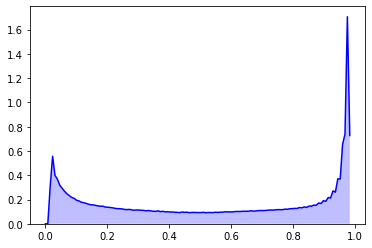

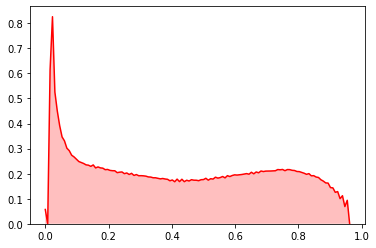

In [36]:
sns.kdeplot(iop_wm_mask.flatten(), shade=True, color='blue')
plt.show()

sns.kdeplot(guys_gm_mask.flatten(), shade=True, color='red')
plt.show()

Nous allons transformer ces probabilités en prédiction binaire (1/0).

In [0]:
# Masque matière blanche de notre image Hammersmith Hospital
hh_wm_mask = np.where(hh_wm_mask >= 0.6, 1, 0)

# Masque matière grise de notre image Hammersmith Hospital
hh_gm_mask = np.where(hh_gm_mask >= 0.6, 1, 0)

# Masque matière blanche de notre image Hammersmith Hospital
iop_wm_mask = np.where(iop_wm_mask >= 0.6, 1, 0)

# Masque matière grise de notre image Hammersmith Hospital
iop_gm_mask = np.where(iop_gm_mask >= 0.6, 1, 0)

# Masque matière blanche de notre image Hammersmith Hospital
guys_wm_mask = np.where(guys_wm_mask >= 0.6, 1, 0)

# Masque matière grise de notre image Hammersmith Hospital
guys_gm_mask = np.where(guys_gm_mask >= 0.6, 1, 0)

Nous obtenons bien des distributions binaires pour tous nos masques.

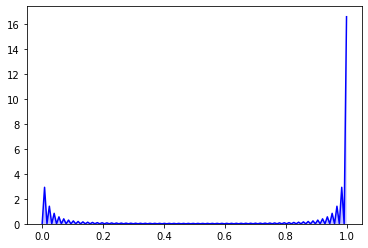

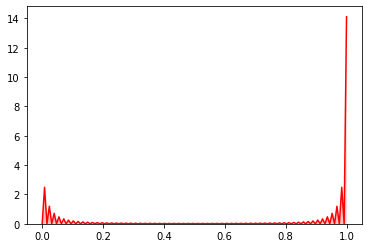

In [38]:
sns.kdeplot(guys_wm_mask.flatten(), shade=True, color='blue')
plt.show()

sns.kdeplot(guys_gm_mask.flatten(), shade=True, color='red')
plt.show()

On multiplie nos masques binaires identifiant la matière blanche avec nos images afin de garder seulement les intensités des matières blanche et grise.

In [0]:
# Multplication de notre masque de matière blanche avec les intensités de notre image IRM
hh_img_wm = hh_wm_mask * hh_brain_img

# Multiplication de notre masque de matière grise avec les intensités de notre image IRM
hh_img_gm = hh_gm_mask * hh_brain_img

# Multplication de notre masque de matière blanche avec les intensités de notre image IRM
iop_img_wm = iop_wm_mask * iop_brain_img

# Multiplication de notre masque de matière grise avec les intensités de notre image IRM
iop_img_gm = iop_gm_mask * iop_brain_img

# Multplication de notre masque de matière blanche avec les intensités de notre image IRM
guys_img_wm = guys_wm_mask * guys_brain_img

# Multiplication de notre masque de matière grise avec les intensités de notre image IRM
guys_img_gm = guys_gm_mask * guys_brain_img

On peut visualiser la segmentation de notre matière blanche et matière grise.

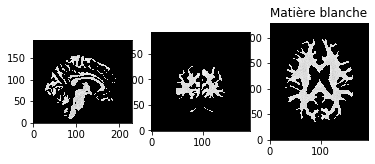

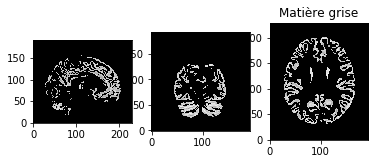

In [41]:
# Visualisation d'une coupe Axiale de l'image
slice_0 = guys_img_wm[90, :, :]

# Visualisation d'une coupe Coronale de l'image
slice_1 = guys_img_wm[:, 50, :]

# Visualisation d'une coupe sagittale de l'image
slice_2 = guys_img_wm[:, :, 100]

show_slices([slice_0, slice_1, slice_2])
plt.title('Matière blanche')
plt.show()

# Visualisation d'une coupe Axiale de l'image
slice_0 = guys_img_gm[90, :, :]

# Visualisation d'une coupe Coronale de l'image
slice_1 = guys_img_gm[:, 50, :]

# Visualisation d'une coupe sagittale de l'image
slice_2 = guys_img_gm[:, :, 100]

show_slices([slice_0, slice_1, slice_2])
plt.title('Matière grise')
plt.show()

Nous pouvons tracer la distribution des intensités pour notre image de notre matière blanche et de notre matière grise.

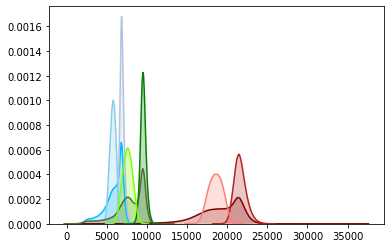

In [42]:
# Distribution des intensités de notre image
sns.kdeplot(hh_brain_img.flatten()[hh_brain_img.flatten()>0], shade=True, color='deepskyblue')

# Distribution des intensités de la matière blanche
sns.kdeplot(hh_img_wm.flatten()[hh_img_wm.flatten()>0], shade=True, color='lightsteelblue')

# Distribution des intensités de la matière grise
sns.kdeplot(hh_img_gm.flatten()[hh_img_gm.flatten()>0], shade=True, color='skyblue')

# Distribution des intensités de notre image
sns.kdeplot(iop_brain_img.flatten()[iop_brain_img.flatten()>0], shade=True, color='maroon')

# Distribution des intensités de la matière blanche
sns.kdeplot(iop_img_wm.flatten()[iop_img_wm.flatten()>0], shade=True, color='firebrick')

# Distribution des intensités de la matière grise
sns.kdeplot(iop_img_gm.flatten()[iop_img_gm.flatten()>0], shade=True, color='salmon')

# Distribution des intensités de notre image
sns.kdeplot(guys_brain_img.flatten()[guys_brain_img.flatten()>0], shade=True, color='darkolivegreen')

# Distribution des intensités de la matière blanche
sns.kdeplot(guys_img_wm.flatten()[guys_img_wm.flatten()>0], shade=True, color='green')

# Distribution des intensités de la matière grise
sns.kdeplot(guys_img_gm.flatten()[guys_img_gm.flatten()>0], shade=True, color='chartreuse')
plt.show()

## D'une mesure qualitative à une mesure quantitative

Nous pouvons essayer d'utiliser la min-max normalisation utilisée pour la normalisation des photos.

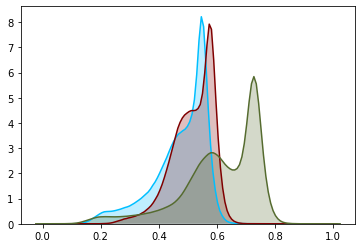

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


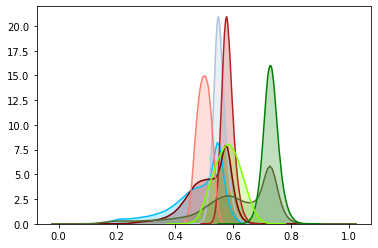

In [43]:
hh_max = np.max(hh_brain_img)
hh_min = np.max((np.min(hh_brain_img),0))

hh_minmax_img = (hh_brain_img - hh_min) / (hh_max - hh_min)
hh_minmax_wm = (hh_img_wm - hh_min) / (hh_max - hh_min)
hh_minmax_gm = (hh_img_wm - hh_min) / (hh_max - hh_min)

iop_max = np.max(iop_brain_img)
iop_min = np.max((np.min(iop_brain_img), 0))

iop_minmax_img = (iop_brain_img - iop_min) / (iop_max - iop_min)
iop_minmax_wm = (iop_img_wm - iop_min) / (iop_max - iop_min)
iop_minmax_gm = (iop_img_gm - iop_min) / (iop_max - iop_min)

guys_max = np.max(guys_brain_img)
guys_min = np.max((np.min(guys_brain_img),0))

guys_minmax_img = (guys_brain_img - guys_min) / (guys_max - guys_min)
guys_minmax_wm = (guys_img_wm - guys_min) / (guys_max - guys_min)
guys_minmax_gm = (guys_img_gm - guys_min) / (guys_max - guys_min)


# Distribution des intensités de notre image
sns.kdeplot(hh_minmax_img.flatten()[hh_minmax_img.flatten()>0], shade=True, color='deepskyblue')

# Distribution des intensités de notre image
sns.kdeplot(iop_minmax_img.flatten()[iop_minmax_img.flatten()>0], shade=True, color='maroon')

# Distribution des intensités de notre image
sns.kdeplot(guys_minmax_img.flatten()[guys_minmax_img.flatten()>0], shade=True, color='darkolivegreen')

plt.show()

# Distribution des intensités de notre image
sns.kdeplot(hh_minmax_img.flatten()[hh_minmax_img.flatten()>0], shade=True, color='deepskyblue')

# Distribution des intensités de la matière blanche
sns.kdeplot(hh_minmax_wm.flatten()[hh_img_wm.flatten()>0], shade=True, color='lightsteelblue')

# Distribution des intensités de la matière grise
sns.kdeplot(hh_minmax_gm.flatten()[hh_img_gm.flatten()>0], shade=True, color='skyblue')

# Distribution des intensités de notre image
sns.kdeplot(iop_minmax_img.flatten()[iop_minmax_img.flatten()>0], shade=True, color='maroon')

# Distribution des intensités de la matière blanche
sns.kdeplot(iop_minmax_wm.flatten()[iop_img_wm.flatten()>0], shade=True, color='firebrick')

# Distribution des intensités de la matière grise
sns.kdeplot(iop_minmax_gm.flatten()[iop_img_gm.flatten()>0], shade=True, color='salmon')

# Distribution des intensités de notre image
sns.kdeplot(guys_minmax_img.flatten()[guys_minmax_img.flatten()>0], shade=True, color='darkolivegreen')

# Distribution des intensités de la matière blanche
sns.kdeplot(guys_minmax_wm.flatten()[guys_img_wm.flatten()>0], shade=True, color='green')

# Distribution des intensités de la matière grise
sns.kdeplot(guys_minmax_gm.flatten()[guys_img_gm.flatten()>0], shade=True, color='chartreuse')
plt.show()

On peut voir que nos intensités sont normalisés, mais que les valeurs n'ont pas le même sens pour chaque image.

Nous avons repéré les structures importantes (matière blanche, matière grise) pour chaque image. Maintenant nous allons interpoler nos intensités pour que nos images soient sur la même échelle.

Nous allons trouver les pics de matière blanche de chaque image et les faire correspondre à la valeur 1, comme cela si l'on retrouve la valeur 1 sur une image, on saura que le voxel correspondra à de la matière blanche. 

Nous allons trouver les pics de matière grise de chaque image et les faire correspondre à la valeur 0.7, comme cela si l'on retrouve la valeur 0.7 sur une image, on saura que le voxel correspondra à de la matière grise. 

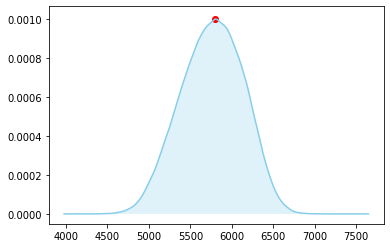

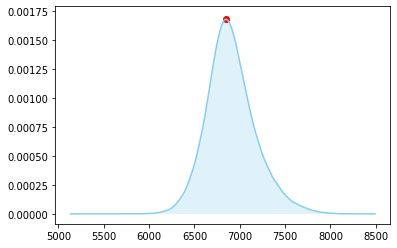

In [44]:
# on récupère les données de notre distribution de matière grise
hh_density_gm = sns.kdeplot(hh_img_gm.flatten()[hh_img_gm.flatten()>0], shade=True, color='skyblue').get_lines()[0].get_data()


hh_gm_peak_value = np.sort(np.array(hh_density_gm)[1, find_peaks(hh_density_gm[1])[0]])[-1]
hh_gm_peak_index = np.squeeze(np.where(hh_density_gm[1] == hh_gm_peak_value))
hh_gm_peak = np.array(hh_density_gm)[:, hh_gm_peak_index]

plt.scatter(hh_gm_peak[0], hh_gm_peak[1], color='red')
plt.show()

# on récupère les données de notre distribution de matière blanche
hh_density_wm = sns.kdeplot(hh_img_wm.flatten()[hh_img_wm.flatten()>0], shade=True, color='skyblue').get_lines()[0].get_data()


hh_wm_peak_value = np.sort(np.array(hh_density_wm)[1, find_peaks(hh_density_wm[1])[0]])[-1]
hh_wm_peak_index = np.squeeze(np.where(hh_density_wm[1] == hh_wm_peak_value))
hh_wm_peak = np.array(hh_density_wm)[:, hh_wm_peak_index]

plt.scatter(hh_wm_peak[0], hh_wm_peak[1], color='red')
plt.show()

Maintenant que nous avons la valeur de nos nouveaux pics nous pouvons interpoler nos intensités.

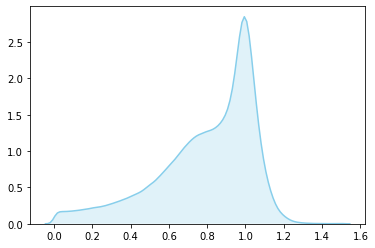

In [45]:
hh_brain_inter_img = 0.25 * (hh_brain_img - hh_gm_peak[0])/(hh_wm_peak[0]-hh_gm_peak[0]) + 0.75
hh_brain_inter_img = np.where(hh_brain_inter_img>=1.5, 1.5, hh_brain_inter_img)

sns.kdeplot(hh_brain_inter_img.flatten()[hh_brain_inter_img.flatten()>0], shade=True, color='skyblue')
plt.show()

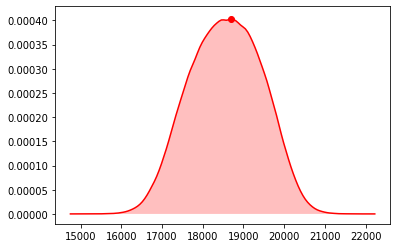

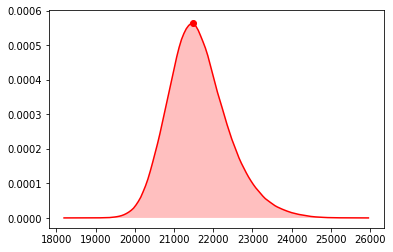

In [46]:
# on récupère les données de notre distribution de matière grise
iop_density_gm = sns.kdeplot(iop_img_gm.flatten()[iop_img_gm.flatten()>0], shade=True, color='red').get_lines()[0].get_data()


iop_gm_peak_value = np.sort(np.array(iop_density_gm)[1, find_peaks(iop_density_gm[1])[0]])[-1]
iop_gm_peak_index = np.squeeze(np.where(iop_density_gm[1] == iop_gm_peak_value))
iop_gm_peak = np.array(iop_density_gm)[:, iop_gm_peak_index]

plt.scatter(iop_gm_peak[0], iop_gm_peak[1], color='red')
plt.show()

# on récupère les données de notre distribution de matière blanche
iop_density_wm = sns.kdeplot(iop_img_wm.flatten()[iop_img_wm.flatten()>0], shade=True, color='red').get_lines()[0].get_data()


iop_wm_peak_value = np.sort(np.array(iop_density_wm)[1, find_peaks(iop_density_wm[1])[0]])[-1]
iop_wm_peak_index = np.squeeze(np.where(iop_density_wm[1] == iop_wm_peak_value))
iop_wm_peak = np.array(iop_density_wm)[:, iop_wm_peak_index]

plt.scatter(iop_wm_peak[0], iop_wm_peak[1], color='red')
plt.show()

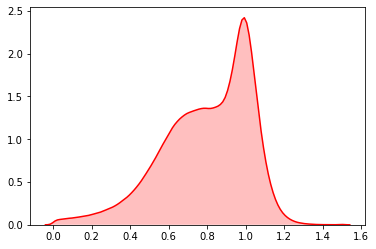

In [47]:
iop_brain_inter_img = 0.25 * (iop_brain_img - iop_gm_peak[0])/(iop_wm_peak[0]-iop_gm_peak[0]) + 0.75
iop_brain_inter_img = np.where(iop_brain_inter_img>1.5, 1.5, iop_brain_inter_img)

sns.kdeplot(iop_brain_inter_img.flatten()[iop_brain_inter_img.flatten()>0], shade=True, color='red')
plt.show()

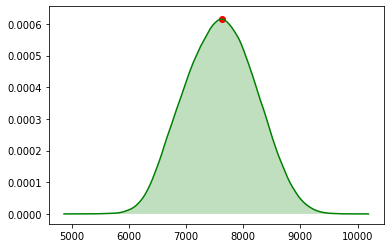

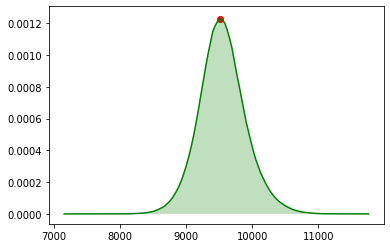

In [48]:
# on récupère les données de notre distribution de matière grise
guys_density_gm = sns.kdeplot(guys_img_gm.flatten()[guys_img_gm.flatten()>0], shade=True, color='green').get_lines()[0].get_data()


guys_gm_peak_value = np.sort(np.array(guys_density_gm)[1, find_peaks(guys_density_gm[1])[0]])[-1]
guys_gm_peak_index = np.squeeze(np.where(guys_density_gm[1] == guys_gm_peak_value))
guys_gm_peak = np.array(guys_density_gm)[:, guys_gm_peak_index]

plt.scatter(guys_gm_peak[0], guys_gm_peak[1], color='red')
plt.show()

# on récupère les données de notre distribution de matière blanche
guys_density_wm = sns.kdeplot(guys_img_wm.flatten()[guys_img_wm.flatten()>0], shade=True, color='green').get_lines()[0].get_data()


guys_wm_peak_value = np.sort(np.array(guys_density_wm)[1, find_peaks(guys_density_wm[1])[0]])[-1]
guys_wm_peak_index = np.squeeze(np.where(guys_density_wm[1] == guys_wm_peak_value))
guys_wm_peak = np.array(guys_density_wm)[:, guys_wm_peak_index]

plt.scatter(guys_wm_peak[0], guys_wm_peak[1], color='red')
plt.show()

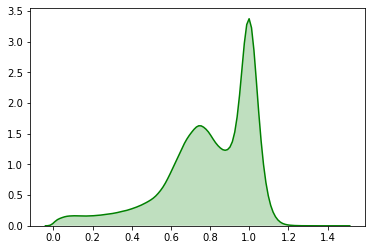

In [49]:
guys_brain_inter_img = 0.25 * (guys_brain_img - guys_gm_peak[0])/(guys_wm_peak[0]-guys_gm_peak[0]) + 0.75
guys_brain_inter_img = np.where(guys_brain_inter_img>1.5, 1.5, guys_brain_inter_img)

sns.kdeplot(guys_brain_inter_img.flatten()[guys_brain_inter_img.flatten()>0], shade=True, color='green')
plt.show()

On peut voir que maintenant les intensités sont bien sur la même échelle avec 0.7 pour distinguer la matière grise, 1 pour distinguer la matière blanche et un maximum de 1.5 afin de borner nos valeurs et de ne pas être perturbé par des valeurs aberrantes.

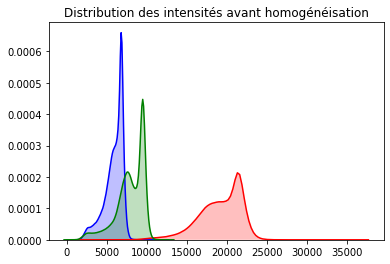

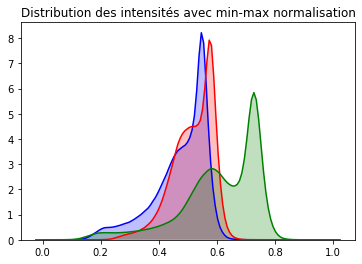

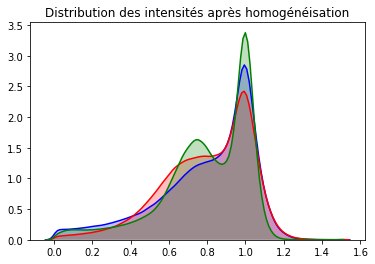

In [50]:
sns.kdeplot(hh_brain_img.flatten()[hh_brain_img.flatten()>0], shade=True, color='blue')

sns.kdeplot(iop_brain_img.flatten()[iop_brain_img.flatten()>0], shade=True, color='red')

sns.kdeplot(guys_brain_img.flatten()[guys_brain_img.flatten()>0], shade=True, color='green')
plt.title('Distribution des intensités avant homogénéisation')
plt.show()

sns.kdeplot(hh_minmax_img.flatten()[hh_minmax_img.flatten()>0], shade=True, color='blue')

sns.kdeplot(iop_minmax_img.flatten()[iop_minmax_img.flatten()>0], shade=True, color='red')

sns.kdeplot(guys_minmax_img.flatten()[guys_minmax_img.flatten()>0], shade=True, color='green')
plt.title('Distribution des intensités avec min-max normalisation')
plt.show()

sns.kdeplot(hh_brain_inter_img.flatten()[hh_brain_inter_img.flatten()>0], shade=True, color='blue')

sns.kdeplot(iop_brain_inter_img.flatten()[iop_brain_inter_img.flatten()>0], shade=True, color='red')

sns.kdeplot(guys_brain_inter_img.flatten()[guys_brain_inter_img.flatten()>0], shade=True, color='green')

plt.title('Distribution des intensités après homogénéisation')
plt.show()

## Sauvegarde des résultats

Maintenant que l'on a extrait le cerveau de nos images IRM, que l'on a corrigé l'inhomogénéité du champ, mis nos images dans le même espace et placer nos intensités à la même échelle nous allons sauvegarder nos données pour pouvoir les utiliser plus tard dans des algorithmes de deep learning.

In [0]:
# Récupérer les métadonnées de l'image IRM
hh_header = nib.load('/content/gdrive/My Drive/tp_3/data/IXI338/sub-IXI338_space-MNI152NLin2009cAsym_desc-preproc_T1w_brain.nii.gz').header

# Nom de votre nouveau fichier 
hh_name = 'hh_mri_proc.nii.gz'

# La fonction Nifti1Image va transformer votre matrice en image Nifti
hh_nii = nib.Nifti1Image(hh_brain_inter_img, affine=None, header=hh_header)

# Sauver notre nouvelle image
nib.save(hh_nii, hh_name)

In [0]:
# Récupérer les métadonnées de l'image IRM
iop_header = nib.load('/content/gdrive/My Drive/tp_3/data/IXI331/sub-IXI331_space-MNI152NLin2009cAsym_desc-preproc_T1w_brain.nii.gz').header

# Nom de votre nouveau fichier 
iop_name = 'iop_mri_proc.nii.gz'

# La fonction Nifti1Image va transformer votre matrice en image Nifti
iop_nii = nib.Nifti1Image(iop_brain_inter_img, affine=None, header=iop_header)

# Sauver notre nouvelle image
nib.save(iop_nii, iop_name)

In [0]:
# Récupérer les métadonnées de l'image IRM
guys_header = nib.load('/content/gdrive/My Drive/tp_3/data/IXI330/sub-330_space-MNI152NLin2009cAsym_desc-preproc_T1w_brain.nii.gz').header

# Nom de votre nouveau fichier 
guys_name = 'guys_mri_proc.nii.gz'

# La fonction Nifti1Image va transformer votre matrice en image Nifti
guys_nii = nib.Nifti1Image(guys_brain_inter_img, affine=None, header=guys_header)

# Sauver notre nouvelle image
nib.save(guys_nii, guys_name)